In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/woc files/linear_train.csv')

In [4]:

x_train=np.array(df.iloc[:,1:-1])
y_train=np.array(df.iloc[:,-1])
print(x_train.shape)
print(y_train.shape)
print(x_train)
print(y_train)


(50000, 20)
(50000,)
[[-2.84685568e+02  2.84567363e+02  1.84627063e+01 ... -1.20010842e+01
   8.39780551e+01  7.37317448e+02]
 [-4.28480005e+02  3.07240676e+02  2.26328973e+01 ...  1.80573704e+01
  -5.55216301e+01  7.75407458e+02]
 [-2.58008787e+01  2.37433758e+02 -4.67504670e-01 ...  7.06526251e+01
   3.02121708e+02  8.10402101e+02]
 ...
 [-2.54691431e+02  2.56793278e+02  2.31974534e+01 ... -2.30785214e+01
   1.88422643e+02  7.48559054e+02]
 [ 7.10054262e+02  2.57565009e+02 -1.63356012e+01 ...  1.52388356e+01
   8.95278167e+01  7.57012968e+02]
 [-2.69821407e+02  2.81097270e+02 -3.05824270e+01 ...  8.34763802e+00
   1.44270028e+02  7.32900535e+02]]
[-218.01623149  154.14084898  394.84970115 ...   -3.44448897  445.35678148
 -500.9246807 ]


In [5]:
mu=np.mean(x_train,axis=0)
sigma=np.std(x_train,axis=0)
x_train_norm=((x_train-mu)/sigma)

fu=3000
x_train_train=x_train_norm[fu:,:]
x_test=x_train_norm[:fu,:]
y_train_train=y_train[fu:]
y_test=y_train[:fu]


Xt = x_train_train
m,n=Xt.shape
Yt = np.reshape(y_train_train,(m,1))
print(Xt.shape)

(47000, 20)


In [6]:

ls=[n,100,50,1]
lss=len(ls)-1
RW=[]
RB=[]
for i in range(lss):
  RW.append(np.random.randn(ls[i],ls[i+1])*(np.sqrt(2/ls[i])))
  RB.append(np.random.randn(1,ls[i+1]))

In [7]:
def Z(X,W,B):#z is function/model
  m,n=X.shape
  z1= np.matmul(X,W)+B
  return z1
def relu(X,W,B,kp):
  m,n=X.shape
  r12=Z(X,W,B)
  r13=r12<0
  r12[r13]=0
  idrop=np.random.rand(r12.shape[0],r12.shape[1])>kp
  r12[idrop]=0
  r12=r12/kp
  return r12
def FP(X,W,B,kp):
  m,n=X.shape
  a=[X]
  for i in range(lss-1):
    a.append(relu(a[i],W[i],B[i],kp))
  a.append(Z(a[lss-1],W[lss-1],B[lss-1]))
  return(a)

In [8]:
At=FP(Xt,RW,RB,1)
print(At[-1])

[[-0.86438256]
 [ 0.12254513]
 [ 0.79421307]
 ...
 [ 0.96592681]
 [-0.89394452]
 [-1.01565794]]


In [9]:
def c(A,Y,W,lam):
  m=Y.shape[0]
  c2=(np.sum((A[-1]-Y)**2))/(2*m)
  for i in range(lss):
    c2= c2+((np.sum(W[i]**2)*lam)/(2*m))
  return c2
print(c(At,Yt,RW,0.1))


30397.368130353585


In [10]:
def Derivatives(X,Y,A,W,B,lam): 
  m,n=X.shape
  dj_da=[0]*lss
  dB=[0]*lss
  dW=[0]*lss
  dj_da[-1]=((A[-1]-Y)/m)
  dB[-1]=np.sum(dj_da[-1],axis=0)
  dW[-1]=np.matmul(A[-2].T,dj_da[-1])+((lam/m)*W[-1])
  for i in range(lss-2,-1,-1):
    dj_da[i]=np.matmul(dj_da[i+1],W[i+1].T)
    temz1=A[i+1]==0
    dj_da[i][temz1]=0
    dB[i]=np.sum(dj_da[i],axis=0)
    dW[i]=np.matmul(A[i].T,dj_da[i])+((lam/m)*W[i])
  return dW,dB

In [11]:
def p(X,W,B): #pridiction
  m,n=X.shape
  y4=FP(X,W,B,1)
  y5=y4[-1]
  return y5

print(p(Xt,RW,RB))

[[-0.86438256]
 [ 0.12254513]
 [ 0.79421307]
 ...
 [ 0.96592681]
 [-0.89394452]
 [-1.01565794]]


..........4731.537175354869
0.8442327120381918
..........4713.413068944604
0.8448293822212143
..........4681.2146681253735
0.845889393550863
..........4666.365529891785
0.8463782475089786
..........4652.063841782712
0.8468490786115386
..........4638.9719234351005
0.8472800822653193
..........4634.124594119137
0.8474396648475655
..........4620.233874125572
0.8478969653827904
..........4613.433710886913
0.8481208367380135
..........4606.502072280586
0.8483490361144055


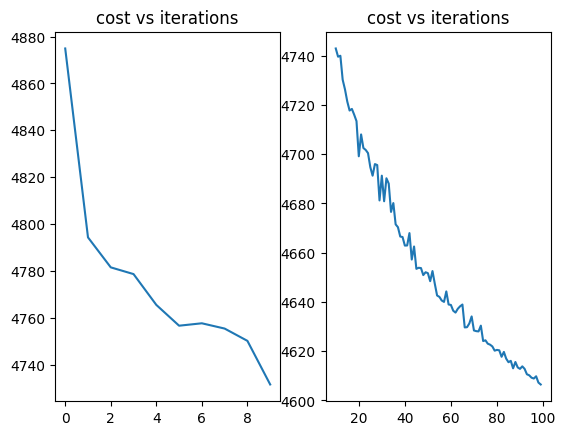

i=100,cost=4606.502072280586
18400


In [22]:

def g(X,Y,W,B,alo,dr,it,lam,bs,kp): #g is gradiant
  m,n=X.shape
  c_log=np.zeros(it)
  VdW=[0]*lss
  VdB=[0]*lss
  SdW=[0]*lss
  SdB=[0]*lss
  VdWc=[0]*lss
  VdBc=[0]*lss
  SdWc=[0]*lss
  SdBc=[0]*lss
  bsr=(m//bs)+1
  t=0
  for i in range(it):
    al=(1/(1+(dr*i)))*alo
    for k in range(bsr):
      Xmb=X[(bs*k):(bs*(k+1)),:]
      Ymb=Y[(bs*k):(bs*(k+1)),:]
      Amb=FP(Xmb,W,B,kp)
      dW,dB = Derivatives(Xmb,Ymb,Amb,W,B,lam)
      t=t+1
      for j in range(lss):
        VdW[j]=(0.9*VdW[j])+((0.1)*dW[j])
        VdB[j]=(0.9*VdB[j])+((0.1)*dB[j])
        SdW[j]=(0.999*SdW[j])+((0.001)*(dW[j]**2))
        SdB[j]=(0.999*SdB[j])+((0.001)*(dB[j]**2))
        VdWc[j]=VdW[j]/(1-(0.9**t))
        VdBc[j]=VdB[j]/(1-(0.9**t))
        SdWc[j]=SdW[j]/(1-(0.999**t))
        SdBc[j]=SdB[j]/(1-(0.999**t))
        W[j]=(W[j]-((al*VdWc[j])/(1e-8+(SdWc[j]**(0.5)))))
        B[j]=(B[j]-((al*VdBc[j])/(1e-8+(SdBc[j]**(0.5)))))
    m,n=X.shape
    A=FP(X,W,B,1)
    c_log[i]=c(A,Y,W,lam)
    print('',end='.')
    if (i+1)%10==0:
      print(c_log[i])
      TSS=np.sum((Y-np.mean(Y))**2)
      RSS=np.sum((A[-1]-Y)**2)
      R_2=(1-(RSS/TSS))
      print(R_2)

  fig,(ax1,ax2)=plt.subplots(1,2)
  ax1.plot(c_log[:10])
  ax2.plot(10+np.arange(len(c_log[10:])),c_log[10:])
  ax1.set_title("cost vs iterations")
  ax2.set_title("cost vs iterations")
  plt.show()
  print(f"i={it},cost={c(A,Y,W,lam)}")
  print(t)
  return W,B
ls=[n,100,50,1]
lss=len(ls)-1
RW=[]
RB=[]
for i in range(lss):
  RW.append(np.random.randn(ls[i],ls[i+1])*(np.sqrt(2/ls[i])))
  RB.append(np.random.randn(1,ls[i+1]))
Wf,Bf= g(Xt,Yt,RW,RB,0.01,0.1,100,0.1,256,0.9)

In [24]:
pre=p(x_test,Wf,Bf)
TSS=np.sum((y_test-np.mean(y_test))**2)
RSS=np.sum((pre-np.reshape(y_test,(-1,1)))**2)
R_2=(1-(RSS/TSS))
print(R_2)
(pre)

0.8412725706929871


array([[-191.4679653 ],
       [   2.71336533],
       [ 465.89783726],
       ...,
       [-349.62687404],
       [-379.44097906],
       [ -41.85975987]])